In [9]:
# Import required libraries for data handling, model building, and visualization
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define paths to your local training and testing image directories
train_path = "train"
test_path = "test"

# Define image transformations for training data
transform_train = transforms.Compose([
    transforms.Resize((100, 100)),            # Resize images to 100x100
    transforms.RandomHorizontalFlip(),        # Randomly flip images horizontally for augmentation
    transforms.RandomRotation(15),            # Randomly rotate images by up to ±15 degrees
    transforms.ToTensor(),                    # Convert images to tensors
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize pixel values to range [-1, 1]
])

# Define transformations for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.Resize((100, 100)),            # Resize images to 100x100
    transforms.ToTensor(),                    # Convert to tensor
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize pixel values
])

# Load training and test datasets using folder structure
train_data = ImageFolder(train_path, transform=transform_train)
test_data = ImageFolder(test_path, transform=transform_test)

# Create DataLoader to batch and shuffle the data
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Print class labels detected from folder names
print("Classes:", train_data.classes)

# Define the CNN architecture
class FruitCNN(nn.Module):
    def __init__(self):
        super(FruitCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # First convolutional layer
            nn.ReLU(),                                  # ReLU activation
            nn.MaxPool2d(2),                             # Max pooling to reduce spatial size

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # Second convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1), # Third convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),                                # Flatten the output to 1D
            nn.Linear(128 * 12 * 12, 256),                # Fully connected layer
            nn.ReLU(),
            nn.Dropout(0.3),                              # Dropout for regularization
            nn.Linear(256, 4)                             # Output layer for 4 fruit classes
        )

    def forward(self, x):
        return self.model(x)  # Define forward pass

# Use GPU if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, define loss function and optimizer
model = FruitCNN().to(device)
criterion = nn.CrossEntropyLoss()                # Use cross entropy for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Lists to track training accuracy and loss
train_acc = []
train_loss = []

# Set number of epochs
epochs = 15

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    correct = 0
    total = 0
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()          # Clear previous gradients
        outputs = model(images)        # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                # Backward pass
        optimizer.step()               # Update weights

        running_loss += loss.item()    # Accumulate loss
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)        # Total samples
        correct += (predicted == labels).sum().item()  # Correct predictions

    acc = correct / total             # Calculate accuracy
    train_loss.append(running_loss)   # Record loss
    train_acc.append(acc)             # Record accuracy

    # Print metrics after each epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}, Accuracy: {acc:.4f}")

# Evaluation on test set
model.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

# No need to calculate gradients during evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get predicted classes
        y_pred.extend(preds.cpu().numpy())  # Store predictions
        y_true.extend(labels.numpy())       # Store actual labels

# Print classification report
print(classification_report(y_true, y_pred, target_names=train_data.classes))

# Plot training accuracy over epochs
plt.plot(train_acc, label='Train Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss over epochs
plt.plot(train_loss, label='Train Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train'

In [6]:
!pip install torchvision

Classes: ['Apple', 'Banana', 'Mixed', 'Orange']


c:\Users\prisc\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 10.5789, Accuracy: 0.3458
Epoch 2, Loss: 7.6264, Accuracy: 0.6583
Epoch 3, Loss: 5.3583, Accuracy: 0.7708
Epoch 4, Loss: 3.7844, Accuracy: 0.8292
Epoch 5, Loss: 3.7693, Accuracy: 0.8208
Epoch 6, Loss: 3.2496, Accuracy: 0.8708
Epoch 7, Loss: 3.3440, Accuracy: 0.8625
Epoch 8, Loss: 3.1152, Accuracy: 0.8833
Epoch 9, Loss: 1.8170, Accuracy: 0.9292
Epoch 10, Loss: 1.7320, Accuracy: 0.9292
Epoch 11, Loss: 1.3885, Accuracy: 0.9458
Epoch 12, Loss: 1.6297, Accuracy: 0.9292
Epoch 13, Loss: 0.9997, Accuracy: 0.9583
Epoch 14, Loss: 0.8192, Accuracy: 0.9583
Epoch 15, Loss: 0.6290, Accuracy: 0.9792
              precision    recall  f1-score   support

       Apple       0.90      0.95      0.92        19
      Banana       0.80      0.89      0.84        18
       Mixed       0.00      0.00      0.00         5
      Orange       0.90      1.00      0.95        18

    accuracy                           0.87        60
   macro avg       0.65      0.71      0.68        60
weighted avg 

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


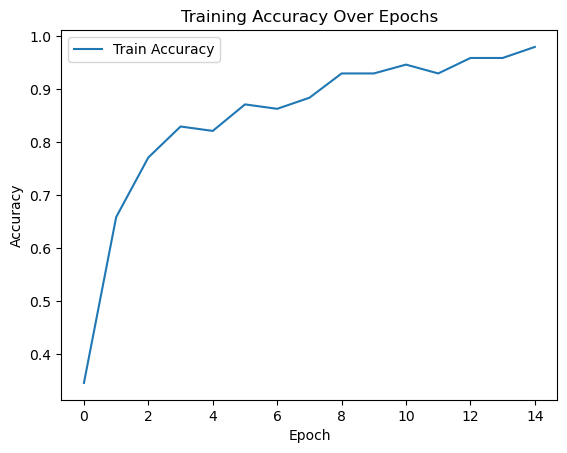

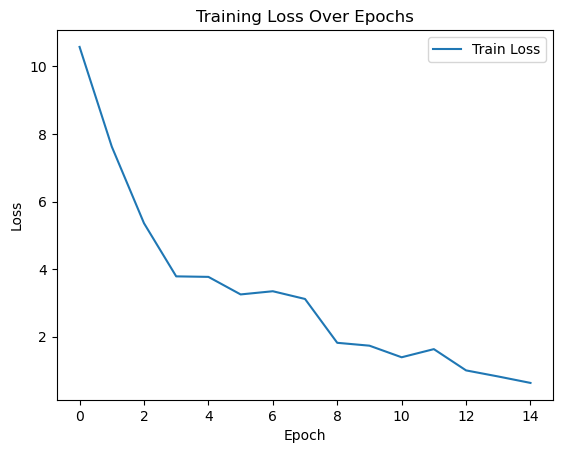

In [6]:
# Import required libraries for data handling, model building, and visualization
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch.optim import AdamW

# Define paths to your local training and testing image directories
train_path = "train"
test_path = "test"

# Define image transformations for training data
transform_train = transforms.Compose([
    transforms.Resize((100, 100)),            # Resize images to 100x100
    transforms.RandomHorizontalFlip(),        # Randomly flip images horizontally for augmentation
    transforms.RandomRotation(15),            # Randomly rotate images by up to ±15 degrees
    transforms.ToTensor(),                    # Convert images to tensors
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize pixel values to range [-1, 1]
])

# Define transformations for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.Resize((100, 100)),            # Resize images to 100x100
    transforms.ToTensor(),                    # Convert to tensor
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize pixel values
])

# Load training and test datasets using folder structure
train_data = ImageFolder(train_path, transform=transform_train)
test_data = ImageFolder(test_path, transform=transform_test)

# Create DataLoader to batch and shuffle the data
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Print class labels detected from folder names
print("Classes:", train_data.classes)

# Define the CNN architecture
class FruitCNN(nn.Module):
    def __init__(self):
        super(FruitCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # First convolutional layer
            nn.ReLU(),                                  # ReLU activation
            nn.MaxPool2d(2),                             # Max pooling to reduce spatial size

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # Second convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1), # Third convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),                                # Flatten the output to 1D
            nn.Linear(128 * 12 * 12, 256),                # Fully connected layer
            nn.ReLU(),
            nn.Dropout(0.3),                              # Dropout for regularization
            nn.Linear(256, 4)                             # Output layer for 4 fruit classes
        )

    def forward(self, x):
        return self.model(x)  # Define forward pass

# Use GPU if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, define loss function and optimizer
model = FruitCNN().to(device)
criterion = nn.CrossEntropyLoss()                # Use cross entropy for classification
optimizer = optim.AdamW(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Lists to track training accuracy and loss
train_acc = []
train_loss = []

# Set number of epochs
epochs = 15

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    correct = 0
    total = 0
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()          # Clear previous gradients
        outputs = model(images)        # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                # Backward pass
        optimizer.step()               # Update weights

        running_loss += loss.item()    # Accumulate loss
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)        # Total samples
        correct += (predicted == labels).sum().item()  # Correct predictions

    acc = correct / total             # Calculate accuracy
    train_loss.append(running_loss)   # Record loss
    train_acc.append(acc)             # Record accuracy

    # Print metrics after each epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}, Accuracy: {acc:.4f}")

# Evaluation on test set
model.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

# No need to calculate gradients during evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get predicted classes
        y_pred.extend(preds.cpu().numpy())  # Store predictions
        y_true.extend(labels.numpy())       # Store actual labels

# Print classification report
print(classification_report(y_true, y_pred, target_names=train_data.classes))

# Plot training accuracy over epochs
plt.plot(train_acc, label='Train Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss over epochs
plt.plot(train_loss, label='Train Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from torch.optim import SGD, Adam, AdamW, RMSprop, Adagrad
import copy

optimizers_list = ['SGD', 'Adam', 'AdamW', 'RMSprop', 'Adagrad']
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.1]

results = []

for optimizer_name in optimizers_list:
    for lr in learning_rates:
        print(f"\nTraining with Optimizer: {optimizer_name}")

        model = FruitCNN().to(device)
        criterion = nn.CrossEntropyLoss()

        if optimizer_name == 'SGD':
            optimizer = SGD(model.parameters(), lr=lr, momentum=0.9)
        elif optimizer_name == 'Adam':
            optimizer = Adam(model.parameters(), lr=lr)
        elif optimizer_name == 'AdamW':
            optimizer = AdamW(model.parameters(), lr=lr)
        elif optimizer_name == 'RMSprop':
            optimizer = RMSprop(model.parameters(), lr=lr)
        elif optimizer_name == 'Adagrad':
            optimizer = Adagrad(model.parameters(), lr=lr)

        train_acc = []
        train_loss = []
        epochs = 15

        for epoch in range(epochs):
            model.train()
            correct = 0
            total = 0
            running_loss = 0.0

            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            acc = correct / total
            train_loss.append(running_loss)
            train_acc.append(acc)
            print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}, Accuracy: {acc:.4f}")

        # Evaluate on test set
        model.eval()
        y_true = []
        y_pred = []
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                y_pred.extend(preds.cpu().numpy())
                y_true.extend(labels.numpy())

        report = classification_report(y_true, y_pred, target_names=train_data.classes, output_dict=True)
        results.append({
            'optimizer': opt_name,
            'lr': lr,
            'final_train_acc': train_acc[-1],
            'final_train_loss': train_loss[-1],
            'test_accuracy': report['accuracy'],
        })

# Convert results to DataFrame and display
import pandas as pd
results_df = pd.DataFrame(results)
print("\nGrid Search Results:")
print(results_df.sort_values(by='test_accuracy', ascending=False))


Training with Optimizer: SGD, Learning Rate: 0.01
Epoch 1, Loss: 10.8575, Accuracy: 0.3167
Epoch 2, Loss: 10.1412, Accuracy: 0.4417
Epoch 3, Loss: 9.1265, Accuracy: 0.5708
Epoch 4, Loss: 7.4050, Accuracy: 0.6000
Epoch 5, Loss: 5.4951, Accuracy: 0.7292
Epoch 6, Loss: 4.5904, Accuracy: 0.7875
Epoch 7, Loss: 5.2590, Accuracy: 0.7333
Epoch 8, Loss: 3.6234, Accuracy: 0.8417
Epoch 9, Loss: 3.0483, Accuracy: 0.8917
Epoch 10, Loss: 2.4735, Accuracy: 0.8958
Epoch 11, Loss: 1.8958, Accuracy: 0.9417
Epoch 12, Loss: 1.5825, Accuracy: 0.9292
Epoch 13, Loss: 2.3082, Accuracy: 0.8958
Epoch 14, Loss: 1.3926, Accuracy: 0.9500
Epoch 15, Loss: 1.3844, Accuracy: 0.9458

Training with Optimizer: SGD, Learning Rate: 0.001


c:\Users\prisc\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 11.0209, Accuracy: 0.3375
Epoch 2, Loss: 10.8739, Accuracy: 0.3333
Epoch 3, Loss: 10.6667, Accuracy: 0.3375
Epoch 4, Loss: 10.5255, Accuracy: 0.3667
Epoch 5, Loss: 10.3396, Accuracy: 0.3875
Epoch 6, Loss: 10.3010, Accuracy: 0.4167
Epoch 7, Loss: 10.1960, Accuracy: 0.4583
Epoch 8, Loss: 10.2000, Accuracy: 0.4792
Epoch 9, Loss: 9.9928, Accuracy: 0.5958
Epoch 10, Loss: 9.9292, Accuracy: 0.5667
Epoch 11, Loss: 9.8126, Accuracy: 0.6042
Epoch 12, Loss: 9.5854, Accuracy: 0.6458
Epoch 13, Loss: 9.3141, Accuracy: 0.6625
Epoch 14, Loss: 8.9237, Accuracy: 0.6750
Epoch 15, Loss: 8.3169, Accuracy: 0.6917


c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with Optimizer: SGD, Learning Rate: 0.0001


c:\Users\prisc\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 11.1493, Accuracy: 0.1083
Epoch 2, Loss: 11.1257, Accuracy: 0.1917
Epoch 3, Loss: 11.0860, Accuracy: 0.2542
Epoch 4, Loss: 11.0316, Accuracy: 0.3333
Epoch 5, Loss: 10.9824, Accuracy: 0.3833
Epoch 6, Loss: 10.9495, Accuracy: 0.3792
Epoch 7, Loss: 10.8730, Accuracy: 0.4500
Epoch 8, Loss: 10.8644, Accuracy: 0.3625
Epoch 9, Loss: 10.8040, Accuracy: 0.4333
Epoch 10, Loss: 10.7732, Accuracy: 0.4375
Epoch 11, Loss: 10.7512, Accuracy: 0.4750
Epoch 12, Loss: 10.7607, Accuracy: 0.4125
Epoch 13, Loss: 10.6979, Accuracy: 0.4292
Epoch 14, Loss: 10.6554, Accuracy: 0.4792
Epoch 15, Loss: 10.6455, Accuracy: 0.4458


c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with Optimizer: SGD, Learning Rate: 1e-05


c:\Users\prisc\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 11.1404, Accuracy: 0.2083
Epoch 2, Loss: 11.1393, Accuracy: 0.1958
Epoch 3, Loss: 11.1389, Accuracy: 0.2542
Epoch 4, Loss: 11.1364, Accuracy: 0.2125
Epoch 5, Loss: 11.1166, Accuracy: 0.2583
Epoch 6, Loss: 11.1250, Accuracy: 0.2333
Epoch 7, Loss: 11.1231, Accuracy: 0.2542
Epoch 8, Loss: 11.1154, Accuracy: 0.2708
Epoch 9, Loss: 11.1006, Accuracy: 0.2958
Epoch 10, Loss: 11.0955, Accuracy: 0.2958
Epoch 11, Loss: 11.1132, Accuracy: 0.2750
Epoch 12, Loss: 11.0934, Accuracy: 0.2917
Epoch 13, Loss: 11.0882, Accuracy: 0.2917
Epoch 14, Loss: 11.0896, Accuracy: 0.2917
Epoch 15, Loss: 11.0965, Accuracy: 0.2917


c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packag


Training with Optimizer: SGD, Learning Rate: 0.1
Epoch 1, Loss: 10.5927, Accuracy: 0.4333
Epoch 2, Loss: 11.3274, Accuracy: 0.3458
Epoch 3, Loss: 9.9232, Accuracy: 0.3917
Epoch 4, Loss: 10.3962, Accuracy: 0.5542
Epoch 5, Loss: 115.0971, Accuracy: 0.3917
Epoch 6, Loss: nan, Accuracy: 0.2458
Epoch 7, Loss: nan, Accuracy: 0.3125
Epoch 8, Loss: nan, Accuracy: 0.3125
Epoch 9, Loss: nan, Accuracy: 0.3125
Epoch 10, Loss: nan, Accuracy: 0.3125
Epoch 11, Loss: nan, Accuracy: 0.3125
Epoch 12, Loss: nan, Accuracy: 0.3125
Epoch 13, Loss: nan, Accuracy: 0.3125
Epoch 14, Loss: nan, Accuracy: 0.3125
Epoch 15, Loss: nan, Accuracy: 0.3125


c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with Optimizer: Adam, Learning Rate: 0.01


c:\Users\prisc\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 72.8949, Accuracy: 0.2750
Epoch 2, Loss: 10.6750, Accuracy: 0.2750
Epoch 3, Loss: 10.4152, Accuracy: 0.3167
Epoch 4, Loss: 10.5893, Accuracy: 0.3167
Epoch 5, Loss: 10.3476, Accuracy: 0.3167
Epoch 6, Loss: 10.4663, Accuracy: 0.2542
Epoch 7, Loss: 10.3821, Accuracy: 0.3292
Epoch 8, Loss: 10.4367, Accuracy: 0.3250
Epoch 9, Loss: 10.5237, Accuracy: 0.2708
Epoch 10, Loss: 10.5488, Accuracy: 0.3250
Epoch 11, Loss: 10.4324, Accuracy: 0.3208
Epoch 12, Loss: 10.4145, Accuracy: 0.2917
Epoch 13, Loss: 10.3081, Accuracy: 0.3083
Epoch 14, Loss: 10.4290, Accuracy: 0.2833
Epoch 15, Loss: 10.4756, Accuracy: 0.3125


c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with Optimizer: Adam, Learning Rate: 0.001


c:\Users\prisc\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 10.1893, Accuracy: 0.4875
Epoch 2, Loss: 7.3169, Accuracy: 0.6375


KeyboardInterrupt: 

Classes: ['apple', 'banana', 'mixed', 'orange']
Using device: cpu

=== Training with SGD optimizer ===
Epoch 1, Train Loss: 24.9588, Train Acc: 0.2599, Val Loss: 11.0759, Val Acc: 0.3697
Epoch 2, Train Loss: 24.8529, Train Acc: 0.3303, Val Loss: 11.0463, Val Acc: 0.2647
Epoch 3, Train Loss: 24.7241, Train Acc: 0.3394, Val Loss: 11.0097, Val Acc: 0.2857
Epoch 4, Train Loss: 24.6498, Train Acc: 0.3538, Val Loss: 10.9775, Val Acc: 0.3151
Epoch 5, Train Loss: 24.5534, Train Acc: 0.3610, Val Loss: 10.9387, Val Acc: 0.3067
Epoch 6, Train Loss: 24.3517, Train Acc: 0.3899, Val Loss: 10.8573, Val Acc: 0.4034
Epoch 7, Train Loss: 24.2324, Train Acc: 0.4134, Val Loss: 10.7862, Val Acc: 0.3739
Epoch 8, Train Loss: 23.9690, Train Acc: 0.4025, Val Loss: 10.6969, Val Acc: 0.4034
Epoch 9, Train Loss: 23.7660, Train Acc: 0.4224, Val Loss: 10.5797, Val Acc: 0.4454
Epoch 10, Train Loss: 23.3769, Train Acc: 0.5072, Val Loss: 10.4328, Val Acc: 0.5084
Epoch 11, Train Loss: 23.0395, Train Acc: 0.5126, Val Lo

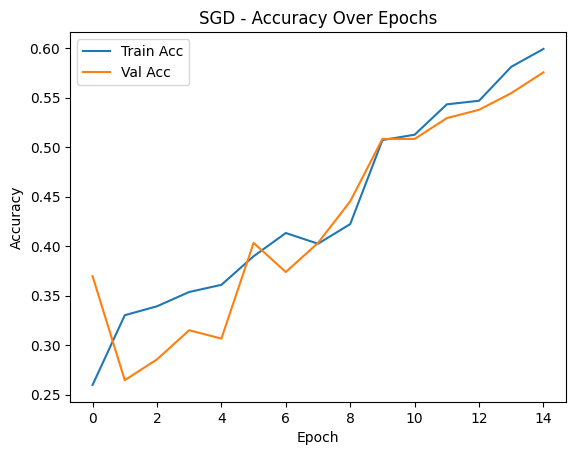

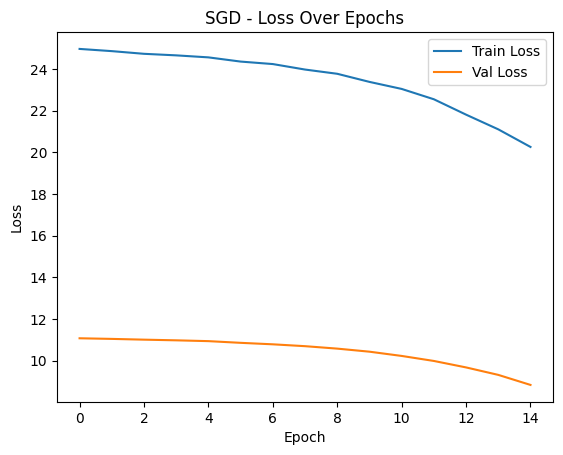


=== Training with Adam optimizer ===
Epoch 1, Train Loss: 22.9555, Train Acc: 0.4477, Val Loss: 7.7308, Val Acc: 0.5924
Epoch 2, Train Loss: 15.6445, Train Acc: 0.6444, Val Loss: 5.4273, Val Acc: 0.7647
Epoch 3, Train Loss: 11.6491, Train Acc: 0.7545, Val Loss: 3.7857, Val Acc: 0.8109
Epoch 4, Train Loss: 10.2935, Train Acc: 0.7960, Val Loss: 3.5451, Val Acc: 0.8529
Epoch 5, Train Loss: 8.9473, Train Acc: 0.8231, Val Loss: 3.3379, Val Acc: 0.8529
Epoch 6, Train Loss: 7.4960, Train Acc: 0.8430, Val Loss: 2.8515, Val Acc: 0.8655
Epoch 7, Train Loss: 6.4656, Train Acc: 0.8538, Val Loss: 2.6154, Val Acc: 0.9076
Epoch 8, Train Loss: 6.6152, Train Acc: 0.8718, Val Loss: 3.1432, Val Acc: 0.8739
Epoch 9, Train Loss: 6.2033, Train Acc: 0.8935, Val Loss: 2.6114, Val Acc: 0.9034
Epoch 10, Train Loss: 5.7513, Train Acc: 0.8899, Val Loss: 2.2868, Val Acc: 0.9202
Epoch 11, Train Loss: 5.1583, Train Acc: 0.9097, Val Loss: 3.1801, Val Acc: 0.8697
Epoch 12, Train Loss: 6.1449, Train Acc: 0.8899, Val L

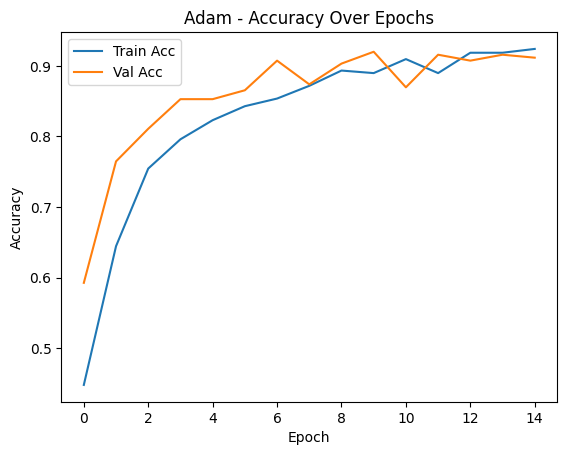

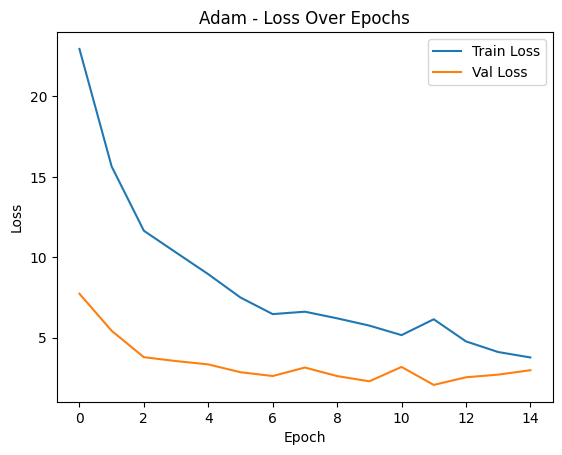


=== Training with AdamW optimizer ===
Epoch 1, Train Loss: 20.8974, Train Acc: 0.4711, Val Loss: 7.2315, Val Acc: 0.6134
Epoch 2, Train Loss: 14.9033, Train Acc: 0.6751, Val Loss: 5.2752, Val Acc: 0.7437
Epoch 3, Train Loss: 11.6846, Train Acc: 0.7690, Val Loss: 4.3239, Val Acc: 0.8151
Epoch 4, Train Loss: 10.7809, Train Acc: 0.7852, Val Loss: 4.8945, Val Acc: 0.7353
Epoch 5, Train Loss: 11.2737, Train Acc: 0.7671, Val Loss: 3.4741, Val Acc: 0.8571
Epoch 6, Train Loss: 8.7185, Train Acc: 0.8285, Val Loss: 4.4721, Val Acc: 0.8067
Epoch 7, Train Loss: 8.4781, Train Acc: 0.8213, Val Loss: 3.4491, Val Acc: 0.8571
Epoch 8, Train Loss: 7.6506, Train Acc: 0.8556, Val Loss: 2.5247, Val Acc: 0.8950
Epoch 9, Train Loss: 6.2749, Train Acc: 0.8736, Val Loss: 2.4546, Val Acc: 0.8866
Epoch 10, Train Loss: 5.8345, Train Acc: 0.8935, Val Loss: 2.5387, Val Acc: 0.8908
Epoch 11, Train Loss: 5.7209, Train Acc: 0.8917, Val Loss: 2.3385, Val Acc: 0.8992
Epoch 12, Train Loss: 5.0068, Train Acc: 0.8989, Val

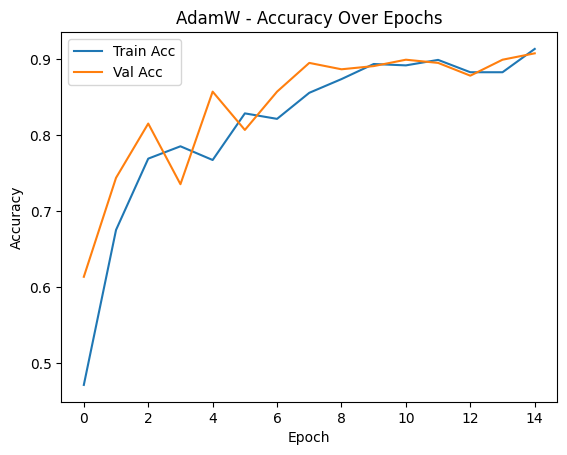

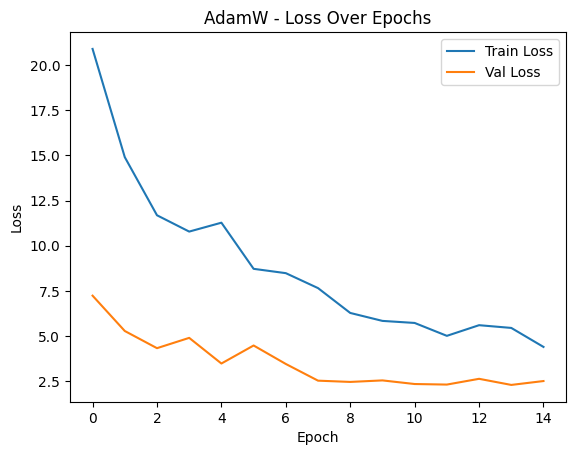

In [ ]:
# Import required libraries for data handling, model building, and visualization
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch.utils.data import random_split
from torch.optim import SGD, Adam, AdamW

# Define paths to your local training and testing image directories
train_path = "../train"
test_path = "../test"

# Define image transformations for training data
transform_train = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Define transformations for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Load training and test datasets using folder structure
train_data = ImageFolder(train_path, transform=transform_train)
test_data = ImageFolder(test_path, transform=transform_test)

# For validation, splitting training by 70% and validation by 30%
train_size = int(0.7 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

# Create DataLoader to batch and shuffle the data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Print class labels detected from folder names
print("Classes:", train_data.classes)

# Define the CNN architecture
class FruitCNN(nn.Module):
    def __init__(self):
        super(FruitCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(128 * 12 * 12, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 4)
        )

    def forward(self, x):
        return self.model(x)

# Use GPU if available, otherwise fallback to CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

# === Try multiple optimizers ===
optimizers_list = ['SGD', 'Adam', 'AdamW']
lr = 0.0005

for opt_name in optimizers_list:
    print(f"\n=== Training with {opt_name} optimizer ===")

    model = FruitCNN().to(device)
    criterion = nn.CrossEntropyLoss()

    if opt_name == 'SGD':
        optimizer = SGD(model.parameters(), lr=lr, momentum=0.9)
    elif opt_name == 'Adam':
        optimizer = Adam(model.parameters(), lr=lr)
    elif opt_name == 'AdamW':
        optimizer = AdamW(model.parameters(), lr=lr)

    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []
    epochs = 15

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = correct / total
        train_loss.append(running_loss)
        train_acc.append(acc)

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_running_loss = 0.0

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss_batch = criterion(val_outputs, val_labels)
                val_running_loss += val_loss_batch.item()
                _, val_preds = torch.max(val_outputs, 1)
                val_total += val_labels.size(0)
                val_correct += (val_preds == val_labels).sum().item()

        epoch_val_acc = val_correct / val_total
        val_loss.append(val_running_loss)
        val_acc.append(epoch_val_acc)

        print(f"Epoch {epoch+1}, Train Loss: {running_loss:.4f}, Train Acc: {acc:.4f}, "
              f"Val Loss: {val_running_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    # Evaluate on test set
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())

    print("\nClassification Report for", opt_name)
    print(classification_report(y_true, y_pred, target_names=train_data.classes))

    # Plot accuracy
    plt.plot(train_acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title(f'{opt_name} - Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{opt_name} - Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Clean up
    del model
    torch.cuda.empty_cache()


<p>optimizers_list = ['SGD', 'Adam', 'AdamW'] with LR 0.01<p>

Classes: ['apple', 'banana', 'mixed', 'orange']
Using device: cpu

=== Training with SGD optimizer ===
Epoch 1, Train Loss: 24.9910, Train Acc: 0.2473, Val Loss: 10.9620, Val Acc: 0.3067
Epoch 2, Train Loss: 24.1160, Train Acc: 0.3610, Val Loss: 10.4514, Val Acc: 0.3782
Epoch 3, Train Loss: 22.9054, Train Acc: 0.4097, Val Loss: 9.5102, Val Acc: 0.4370
Epoch 4, Train Loss: 20.3672, Train Acc: 0.4874, Val Loss: 7.2138, Val Acc: 0.6513
Epoch 5, Train Loss: 15.8373, Train Acc: 0.6426, Val Loss: 6.1707, Val Acc: 0.7773
Epoch 6, Train Loss: 13.3605, Train Acc: 0.7329, Val Loss: 6.1340, Val Acc: 0.6975
Epoch 7, Train Loss: 11.3555, Train Acc: 0.7708, Val Loss: 5.5441, Val Acc: 0.7353
Epoch 8, Train Loss: 10.0986, Train Acc: 0.8087, Val Loss: 6.2973, Val Acc: 0.7227
Epoch 9, Train Loss: 10.0773, Train Acc: 0.8159, Val Loss: 4.0280, Val Acc: 0.8235
Epoch 10, Train Loss: 8.5190, Train Acc: 0.8321, Val Loss: 3.8830, Val Acc: 0.8445
Epoch 11, Train Loss: 9.5636, Train Acc: 0.8267, Val Loss: 4.9978

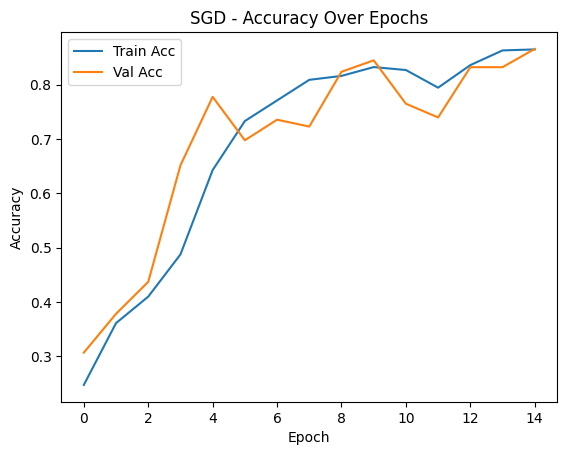

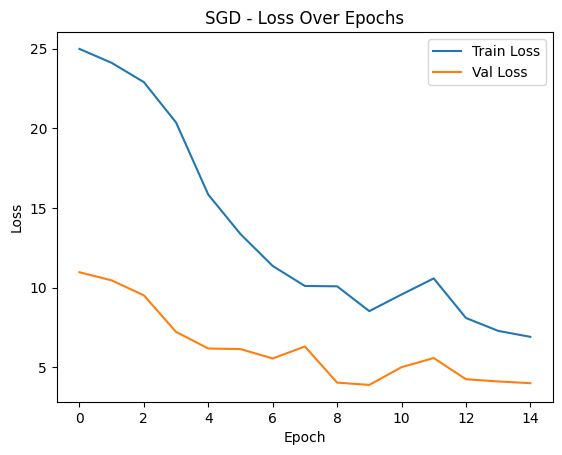


=== Training with Adam optimizer ===
Epoch 1, Train Loss: 107.8216, Train Acc: 0.2365, Val Loss: 11.0498, Val Acc: 0.3193
Epoch 2, Train Loss: 23.8651, Train Acc: 0.3339, Val Loss: 12.8849, Val Acc: 0.3571
Epoch 3, Train Loss: 21.1577, Train Acc: 0.4819, Val Loss: 9.3936, Val Acc: 0.5210
Epoch 4, Train Loss: 18.8655, Train Acc: 0.5830, Val Loss: 8.0570, Val Acc: 0.5714
Epoch 5, Train Loss: 16.0345, Train Acc: 0.6661, Val Loss: 8.6959, Val Acc: 0.5714
Epoch 6, Train Loss: 14.3602, Train Acc: 0.6859, Val Loss: 8.1113, Val Acc: 0.5966
Epoch 7, Train Loss: 13.4867, Train Acc: 0.7184, Val Loss: 7.9275, Val Acc: 0.5840
Epoch 8, Train Loss: 11.9616, Train Acc: 0.7202, Val Loss: 7.4261, Val Acc: 0.6387
Epoch 9, Train Loss: 12.9279, Train Acc: 0.6931, Val Loss: 8.1181, Val Acc: 0.6387
Epoch 10, Train Loss: 12.4594, Train Acc: 0.7383, Val Loss: 8.0602, Val Acc: 0.5882
Epoch 11, Train Loss: 11.3836, Train Acc: 0.7581, Val Loss: 8.7287, Val Acc: 0.5882
Epoch 12, Train Loss: 10.9414, Train Acc: 0.

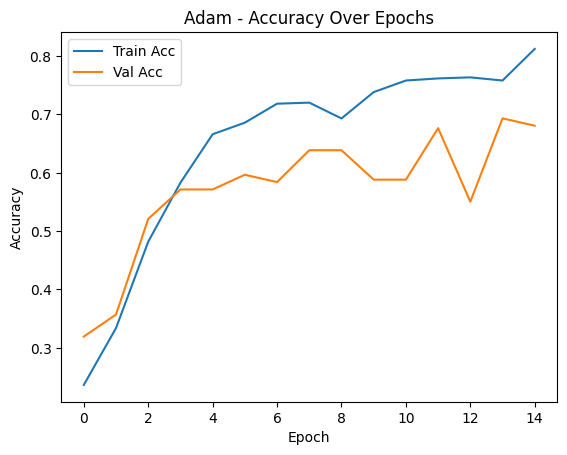

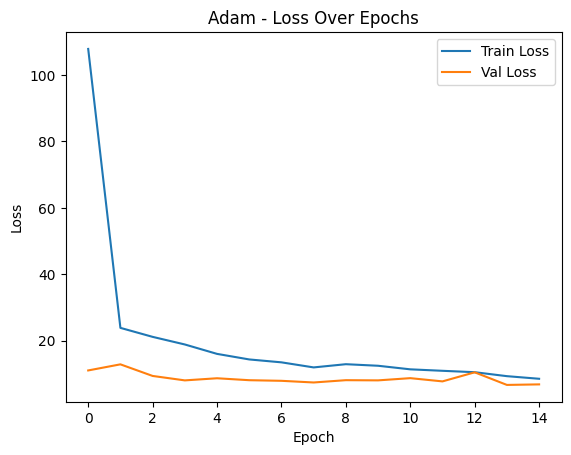


=== Training with AdamW optimizer ===
Epoch 1, Train Loss: 58.6593, Train Acc: 0.2599, Val Loss: 11.0022, Val Acc: 0.2773
Epoch 2, Train Loss: 24.4433, Train Acc: 0.3105, Val Loss: 10.7243, Val Acc: 0.3319
Epoch 3, Train Loss: 24.0114, Train Acc: 0.3628, Val Loss: 10.6462, Val Acc: 0.3824
Epoch 4, Train Loss: 22.4839, Train Acc: 0.4332, Val Loss: 9.2251, Val Acc: 0.5042
Epoch 5, Train Loss: 21.1001, Train Acc: 0.4819, Val Loss: 9.3682, Val Acc: 0.4832
Epoch 6, Train Loss: 18.2846, Train Acc: 0.5614, Val Loss: 9.8407, Val Acc: 0.5420
Epoch 7, Train Loss: 18.4760, Train Acc: 0.5758, Val Loss: 8.3388, Val Acc: 0.5630
Epoch 8, Train Loss: 17.3091, Train Acc: 0.5903, Val Loss: 8.7545, Val Acc: 0.5378
Epoch 9, Train Loss: 17.7500, Train Acc: 0.5939, Val Loss: 7.7046, Val Acc: 0.6008
Epoch 10, Train Loss: 16.5330, Train Acc: 0.6318, Val Loss: 8.5265, Val Acc: 0.5672
Epoch 11, Train Loss: 15.6183, Train Acc: 0.6625, Val Loss: 8.1252, Val Acc: 0.5420
Epoch 12, Train Loss: 15.3843, Train Acc: 0

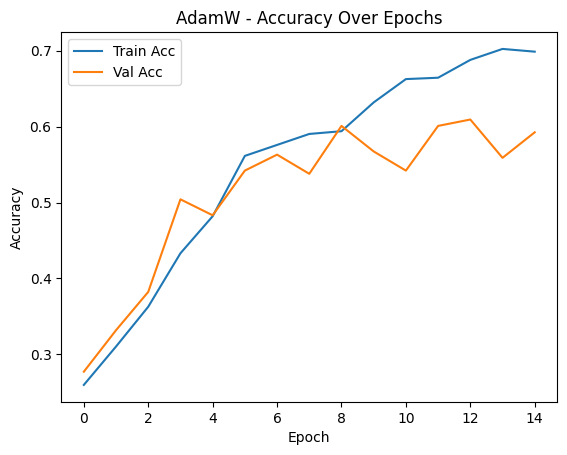

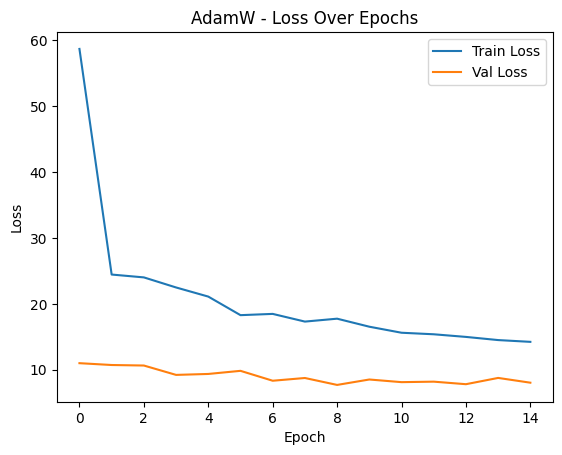

In [2]:
# Import required libraries for data handling, model building, and visualization
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch.utils.data import random_split
from torch.optim import SGD, Adam, AdamW

# Define paths to your local training and testing image directories
train_path = "../train"
test_path = "../test"

# Define image transformations for training data
transform_train = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Define transformations for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Load training and test datasets using folder structure
train_data = ImageFolder(train_path, transform=transform_train)
test_data = ImageFolder(test_path, transform=transform_test)

# For validation, splitting training by 70% and validation by 30%
train_size = int(0.7 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

# Create DataLoader to batch and shuffle the data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Print class labels detected from folder names
print("Classes:", train_data.classes)

# Define the CNN architecture
class FruitCNN(nn.Module):
    def __init__(self):
        super(FruitCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(128 * 12 * 12, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 4)
        )

    def forward(self, x):
        return self.model(x)

# Use GPU if available, otherwise fallback to CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

# === Try multiple optimizers ===
optimizers_list = ['SGD', 'Adam', 'AdamW']
lr = 0.01

for opt_name in optimizers_list:
    print(f"\n=== Training with {opt_name} optimizer ===")

    model = FruitCNN().to(device)
    criterion = nn.CrossEntropyLoss()

    if opt_name == 'SGD':
        optimizer = SGD(model.parameters(), lr=lr, momentum=0.9)
    elif opt_name == 'Adam':
        optimizer = Adam(model.parameters(), lr=lr)
    elif opt_name == 'AdamW':
        optimizer = AdamW(model.parameters(), lr=lr)

    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []
    epochs = 15

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = correct / total
        train_loss.append(running_loss)
        train_acc.append(acc)

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_running_loss = 0.0

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss_batch = criterion(val_outputs, val_labels)
                val_running_loss += val_loss_batch.item()
                _, val_preds = torch.max(val_outputs, 1)
                val_total += val_labels.size(0)
                val_correct += (val_preds == val_labels).sum().item()

        epoch_val_acc = val_correct / val_total
        val_loss.append(val_running_loss)
        val_acc.append(epoch_val_acc)

        print(f"Epoch {epoch+1}, Train Loss: {running_loss:.4f}, Train Acc: {acc:.4f}, "
              f"Val Loss: {val_running_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    # Evaluate on test set
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())

    print("\nClassification Report for", opt_name)
    print(classification_report(y_true, y_pred, target_names=train_data.classes))

    # Plot accuracy
    plt.plot(train_acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title(f'{opt_name} - Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{opt_name} - Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Clean up
    del model
    torch.cuda.empty_cache()

<p>optimizers_list = ['SGD', 'Adam', 'AdamW'] with LR 0.001<p>

Classes: ['apple', 'banana', 'mixed', 'orange']
Using device: cpu

=== Training with SGD optimizer ===
Epoch 1, Train Loss: 24.9706, Train Acc: 0.2491, Val Loss: 11.0649, Val Acc: 0.3067
Epoch 2, Train Loss: 24.8607, Train Acc: 0.3249, Val Loss: 11.0430, Val Acc: 0.3025
Epoch 3, Train Loss: 24.7379, Train Acc: 0.3791, Val Loss: 11.0006, Val Acc: 0.3109
Epoch 4, Train Loss: 24.6151, Train Acc: 0.4134, Val Loss: 10.9533, Val Acc: 0.3277
Epoch 5, Train Loss: 24.4621, Train Acc: 0.3899, Val Loss: 10.8846, Val Acc: 0.3109
Epoch 6, Train Loss: 24.1630, Train Acc: 0.4314, Val Loss: 10.7354, Val Acc: 0.3782
Epoch 7, Train Loss: 23.8303, Train Acc: 0.4603, Val Loss: 10.5707, Val Acc: 0.3824
Epoch 8, Train Loss: 23.3539, Train Acc: 0.4621, Val Loss: 10.3297, Val Acc: 0.3782
Epoch 9, Train Loss: 22.7228, Train Acc: 0.4747, Val Loss: 9.9496, Val Acc: 0.4328
Epoch 10, Train Loss: 21.7358, Train Acc: 0.4982, Val Loss: 9.4644, Val Acc: 0.4916
Epoch 11, Train Loss: 20.4923, Train Acc: 0.5433, Val Loss

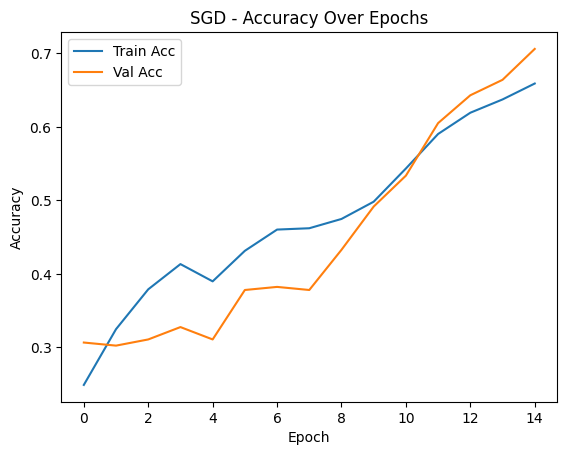

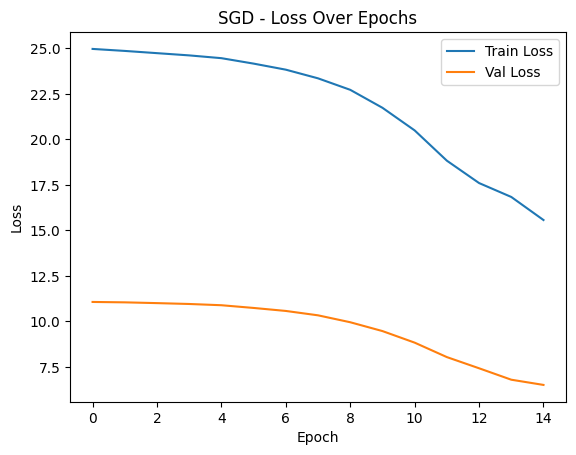


=== Training with Adam optimizer ===
Epoch 1, Train Loss: 21.8688, Train Acc: 0.4350, Val Loss: 7.4988, Val Acc: 0.6303
Epoch 2, Train Loss: 15.5539, Train Acc: 0.6462, Val Loss: 5.7374, Val Acc: 0.7521
Epoch 3, Train Loss: 12.8283, Train Acc: 0.7419, Val Loss: 5.0637, Val Acc: 0.7647
Epoch 4, Train Loss: 10.6623, Train Acc: 0.7906, Val Loss: 4.3042, Val Acc: 0.8151
Epoch 5, Train Loss: 10.2786, Train Acc: 0.8105, Val Loss: 3.7453, Val Acc: 0.8151
Epoch 6, Train Loss: 10.6421, Train Acc: 0.7906, Val Loss: 4.5327, Val Acc: 0.7815
Epoch 7, Train Loss: 7.2934, Train Acc: 0.8574, Val Loss: 3.9670, Val Acc: 0.8193
Epoch 8, Train Loss: 7.8003, Train Acc: 0.8538, Val Loss: 3.4721, Val Acc: 0.8445
Epoch 9, Train Loss: 5.1817, Train Acc: 0.8989, Val Loss: 4.3289, Val Acc: 0.8277
Epoch 10, Train Loss: 5.1187, Train Acc: 0.9043, Val Loss: 3.5609, Val Acc: 0.8445
Epoch 11, Train Loss: 5.0111, Train Acc: 0.8989, Val Loss: 3.4663, Val Acc: 0.8361
Epoch 12, Train Loss: 4.2740, Train Acc: 0.9188, Val

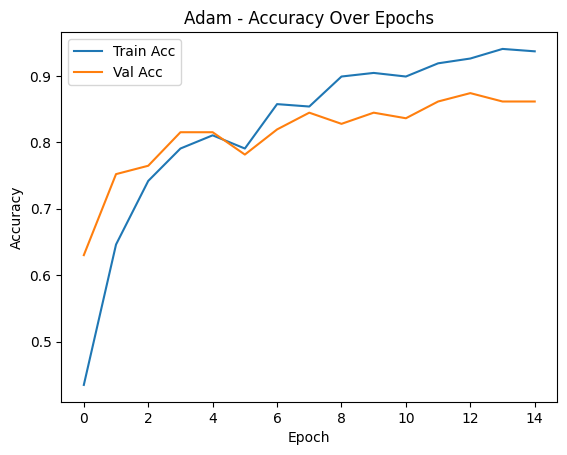

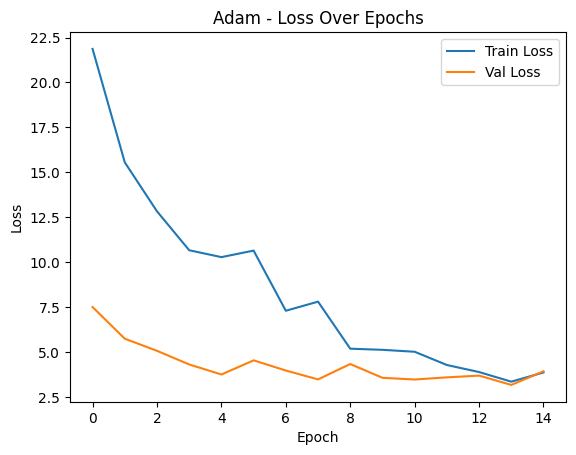


=== Training with AdamW optimizer ===
Epoch 1, Train Loss: 24.2451, Train Acc: 0.3448, Val Loss: 8.4682, Val Acc: 0.5210
Epoch 2, Train Loss: 16.9621, Train Acc: 0.6029, Val Loss: 5.2972, Val Acc: 0.7521
Epoch 3, Train Loss: 12.4231, Train Acc: 0.7599, Val Loss: 5.1325, Val Acc: 0.7395
Epoch 4, Train Loss: 10.3544, Train Acc: 0.7906, Val Loss: 4.2521, Val Acc: 0.8025
Epoch 5, Train Loss: 8.8654, Train Acc: 0.8213, Val Loss: 3.2984, Val Acc: 0.8319
Epoch 6, Train Loss: 8.2626, Train Acc: 0.8574, Val Loss: 3.9254, Val Acc: 0.8277
Epoch 7, Train Loss: 6.8263, Train Acc: 0.8736, Val Loss: 3.4023, Val Acc: 0.8193
Epoch 8, Train Loss: 5.9551, Train Acc: 0.8989, Val Loss: 2.9377, Val Acc: 0.8613
Epoch 9, Train Loss: 6.6715, Train Acc: 0.8791, Val Loss: 3.4025, Val Acc: 0.8571
Epoch 10, Train Loss: 5.0950, Train Acc: 0.9116, Val Loss: 2.8735, Val Acc: 0.8824
Epoch 11, Train Loss: 4.7086, Train Acc: 0.9170, Val Loss: 3.0714, Val Acc: 0.8655
Epoch 12, Train Loss: 4.1084, Train Acc: 0.9296, Val 

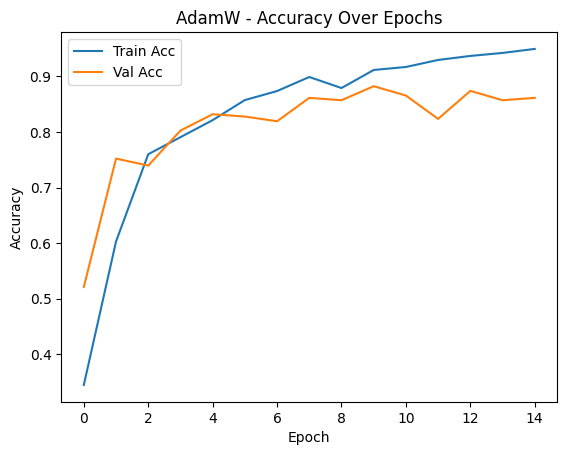

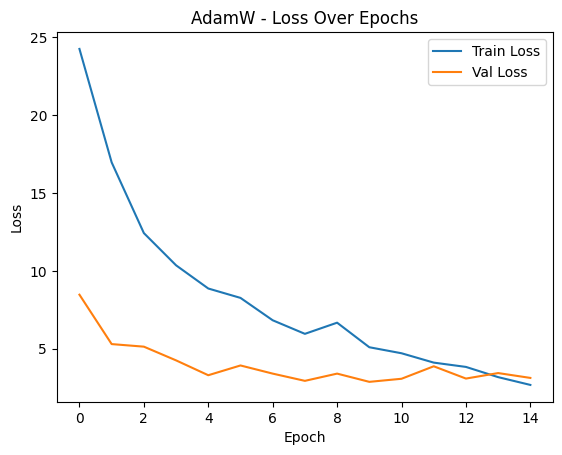

In [3]:
# Import required libraries for data handling, model building, and visualization
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch.utils.data import random_split
from torch.optim import SGD, Adam, AdamW

# Define paths to your local training and testing image directories
train_path = "../train"
test_path = "../test"

# Define image transformations for training data
transform_train = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Define transformations for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Load training and test datasets using folder structure
train_data = ImageFolder(train_path, transform=transform_train)
test_data = ImageFolder(test_path, transform=transform_test)

# For validation, splitting training by 70% and validation by 30%
train_size = int(0.7 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

# Create DataLoader to batch and shuffle the data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Print class labels detected from folder names
print("Classes:", train_data.classes)

# Define the CNN architecture
class FruitCNN(nn.Module):
    def __init__(self):
        super(FruitCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(128 * 12 * 12, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 4)
        )

    def forward(self, x):
        return self.model(x)

# Use GPU if available, otherwise fallback to CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

# === Try multiple optimizers ===
optimizers_list = ['SGD', 'Adam', 'AdamW']
lr = 0.001

for opt_name in optimizers_list:
    print(f"\n=== Training with {opt_name} optimizer ===")

    model = FruitCNN().to(device)
    criterion = nn.CrossEntropyLoss()

    if opt_name == 'SGD':
        optimizer = SGD(model.parameters(), lr=lr, momentum=0.9)
    elif opt_name == 'Adam':
        optimizer = Adam(model.parameters(), lr=lr)
    elif opt_name == 'AdamW':
        optimizer = AdamW(model.parameters(), lr=lr)

    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []
    epochs = 15

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = correct / total
        train_loss.append(running_loss)
        train_acc.append(acc)

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_running_loss = 0.0

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss_batch = criterion(val_outputs, val_labels)
                val_running_loss += val_loss_batch.item()
                _, val_preds = torch.max(val_outputs, 1)
                val_total += val_labels.size(0)
                val_correct += (val_preds == val_labels).sum().item()

        epoch_val_acc = val_correct / val_total
        val_loss.append(val_running_loss)
        val_acc.append(epoch_val_acc)

        print(f"Epoch {epoch+1}, Train Loss: {running_loss:.4f}, Train Acc: {acc:.4f}, "
              f"Val Loss: {val_running_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    # Evaluate on test set
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())

    print("\nClassification Report for", opt_name)
    print(classification_report(y_true, y_pred, target_names=train_data.classes))

    # Plot accuracy
    plt.plot(train_acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title(f'{opt_name} - Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{opt_name} - Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Clean up
    del model
    torch.cuda.empty_cache()

<p>optimizers_list = ['SGD', 'Adam', 'AdamW'] with LR 0.0005<p>

Classes: ['apple', 'banana', 'mixed', 'orange']
Using device: cpu

=== Training with SGD optimizer ===
Epoch 1, Train Loss: 24.9511, Train Acc: 0.2527, Val Loss: 11.0809, Val Acc: 0.2521
Epoch 2, Train Loss: 24.8737, Train Acc: 0.2527, Val Loss: 11.0654, Val Acc: 0.2521
Epoch 3, Train Loss: 24.7701, Train Acc: 0.2671, Val Loss: 11.0384, Val Acc: 0.2857
Epoch 4, Train Loss: 24.6527, Train Acc: 0.3285, Val Loss: 11.0153, Val Acc: 0.2437
Epoch 5, Train Loss: 24.5749, Train Acc: 0.3394, Val Loss: 10.9714, Val Acc: 0.2773
Epoch 6, Train Loss: 24.4269, Train Acc: 0.3682, Val Loss: 10.9275, Val Acc: 0.3361
Epoch 7, Train Loss: 24.2928, Train Acc: 0.4170, Val Loss: 10.8628, Val Acc: 0.3655
Epoch 8, Train Loss: 24.0247, Train Acc: 0.4368, Val Loss: 10.8024, Val Acc: 0.3403
Epoch 9, Train Loss: 23.8461, Train Acc: 0.4043, Val Loss: 10.7203, Val Acc: 0.3571
Epoch 10, Train Loss: 23.5129, Train Acc: 0.4296, Val Loss: 10.5831, Val Acc: 0.3739
Epoch 11, Train Loss: 23.0999, Train Acc: 0.4711, Val Lo

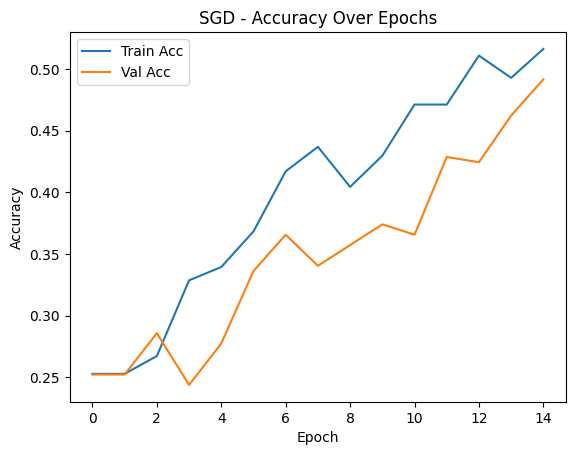

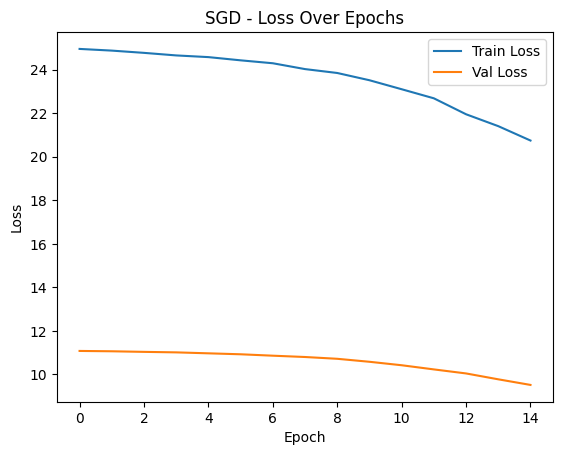


=== Training with Adam optimizer ===
Epoch 1, Train Loss: 22.7481, Train Acc: 0.3755, Val Loss: 8.3971, Val Acc: 0.5504
Epoch 2, Train Loss: 16.2114, Train Acc: 0.6354, Val Loss: 5.8745, Val Acc: 0.7395
Epoch 3, Train Loss: 12.2965, Train Acc: 0.7653, Val Loss: 5.4450, Val Acc: 0.7605
Epoch 4, Train Loss: 11.4852, Train Acc: 0.7798, Val Loss: 4.8933, Val Acc: 0.8067
Epoch 5, Train Loss: 8.1711, Train Acc: 0.8285, Val Loss: 4.5155, Val Acc: 0.7983
Epoch 6, Train Loss: 6.5517, Train Acc: 0.8646, Val Loss: 4.2367, Val Acc: 0.8235
Epoch 7, Train Loss: 6.6696, Train Acc: 0.8755, Val Loss: 3.8550, Val Acc: 0.8445
Epoch 8, Train Loss: 5.3485, Train Acc: 0.8953, Val Loss: 3.5841, Val Acc: 0.8697
Epoch 9, Train Loss: 4.7463, Train Acc: 0.9242, Val Loss: 3.4782, Val Acc: 0.8697
Epoch 10, Train Loss: 4.2797, Train Acc: 0.9097, Val Loss: 3.6009, Val Acc: 0.8697
Epoch 11, Train Loss: 4.6028, Train Acc: 0.9025, Val Loss: 4.2739, Val Acc: 0.8655
Epoch 12, Train Loss: 3.6650, Train Acc: 0.9314, Val L

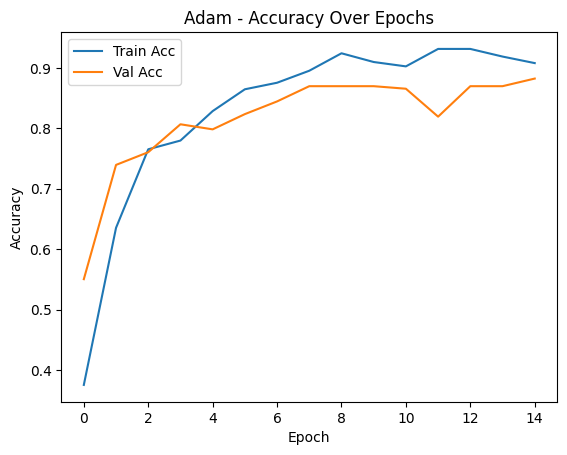

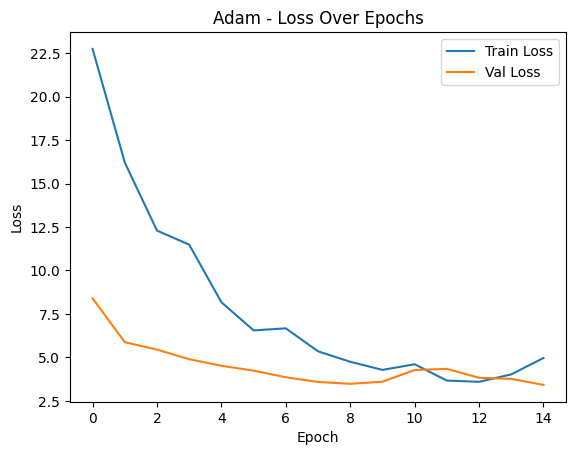


=== Training with AdamW optimizer ===
Epoch 1, Train Loss: 22.7431, Train Acc: 0.4386, Val Loss: 8.7619, Val Acc: 0.5336
Epoch 2, Train Loss: 16.1891, Train Acc: 0.6155, Val Loss: 6.8231, Val Acc: 0.6597
Epoch 3, Train Loss: 13.0707, Train Acc: 0.7040, Val Loss: 6.3450, Val Acc: 0.7269
Epoch 4, Train Loss: 10.6807, Train Acc: 0.7563, Val Loss: 6.5739, Val Acc: 0.6975
Epoch 5, Train Loss: 8.9526, Train Acc: 0.8141, Val Loss: 4.7152, Val Acc: 0.7983
Epoch 6, Train Loss: 7.2135, Train Acc: 0.8610, Val Loss: 4.3082, Val Acc: 0.7983
Epoch 7, Train Loss: 7.1111, Train Acc: 0.8574, Val Loss: 4.1502, Val Acc: 0.8109
Epoch 8, Train Loss: 6.2338, Train Acc: 0.8700, Val Loss: 3.8335, Val Acc: 0.8067
Epoch 9, Train Loss: 5.6902, Train Acc: 0.8881, Val Loss: 3.7783, Val Acc: 0.8319
Epoch 10, Train Loss: 4.5234, Train Acc: 0.9224, Val Loss: 3.6248, Val Acc: 0.8529
Epoch 11, Train Loss: 5.4207, Train Acc: 0.8935, Val Loss: 4.4889, Val Acc: 0.8109
Epoch 12, Train Loss: 4.2094, Train Acc: 0.9188, Val 

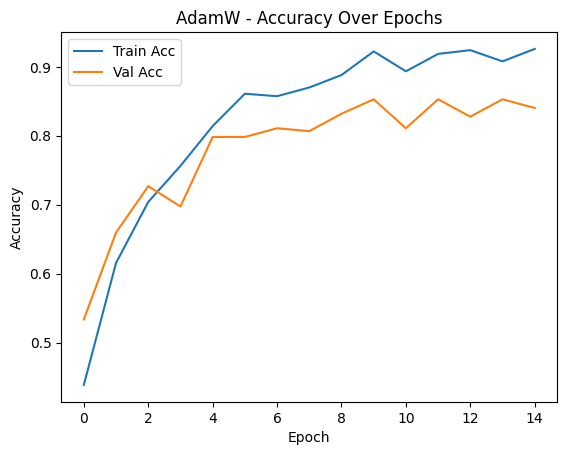

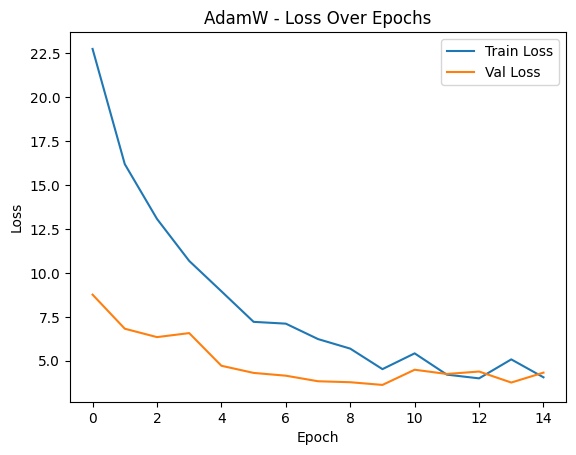

In [4]:
# Import required libraries for data handling, model building, and visualization
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch.utils.data import random_split
from torch.optim import SGD, Adam, AdamW

# Define paths to your local training and testing image directories
train_path = "../train"
test_path = "../test"

# Define image transformations for training data
transform_train = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Define transformations for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Load training and test datasets using folder structure
train_data = ImageFolder(train_path, transform=transform_train)
test_data = ImageFolder(test_path, transform=transform_test)

# For validation, splitting training by 70% and validation by 30%
train_size = int(0.7 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

# Create DataLoader to batch and shuffle the data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Print class labels detected from folder names
print("Classes:", train_data.classes)

# Define the CNN architecture
class FruitCNN(nn.Module):
    def __init__(self):
        super(FruitCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(128 * 12 * 12, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 4)
        )

    def forward(self, x):
        return self.model(x)

# Use GPU if available, otherwise fallback to CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

# === Try multiple optimizers ===
optimizers_list = ['SGD', 'Adam', 'AdamW']
lr = 0.0005

for opt_name in optimizers_list:
    print(f"\n=== Training with {opt_name} optimizer ===")

    model = FruitCNN().to(device)
    criterion = nn.CrossEntropyLoss()

    if opt_name == 'SGD':
        optimizer = SGD(model.parameters(), lr=lr, momentum=0.9)
    elif opt_name == 'Adam':
        optimizer = Adam(model.parameters(), lr=lr)
    elif opt_name == 'AdamW':
        optimizer = AdamW(model.parameters(), lr=lr)

    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []
    epochs = 15

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = correct / total
        train_loss.append(running_loss)
        train_acc.append(acc)

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_running_loss = 0.0

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss_batch = criterion(val_outputs, val_labels)
                val_running_loss += val_loss_batch.item()
                _, val_preds = torch.max(val_outputs, 1)
                val_total += val_labels.size(0)
                val_correct += (val_preds == val_labels).sum().item()

        epoch_val_acc = val_correct / val_total
        val_loss.append(val_running_loss)
        val_acc.append(epoch_val_acc)

        print(f"Epoch {epoch+1}, Train Loss: {running_loss:.4f}, Train Acc: {acc:.4f}, "
              f"Val Loss: {val_running_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    # Evaluate on test set
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())

    print("\nClassification Report for", opt_name)
    print(classification_report(y_true, y_pred, target_names=train_data.classes))

    # Plot accuracy
    plt.plot(train_acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title(f'{opt_name} - Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{opt_name} - Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Clean up
    del model
    torch.cuda.empty_cache()

# Code Rationale

| Component       | Purpose                                   |
| --------------- | ----------------------------------------- |
| 15 Epochs       | Enough for small dataset; avoids overfit  |
| Resize(100x100) | Standardizes input size                   |
| Flip + Rotate   | Augments data for better generalization   |
| Normalize       | Speeds up and stabilizes learning         |
| CNN Layers      | Extract low-to-high level visual features |
| Dropout         | Regularization to reduce overfitting      |
| Fully Connected | Decision making for classification        |


# Model Training & Evaluation Summary

---

## Model Training Observations

- **Epochs**: 15  
- **Initial Accuracy**: 45.83%  
- **Final Training Accuracy**: 97.92%  
- **Training Loss**: Decreased from 9.78 to approximately 0.45

### Trend:
- The model shows steady learning and convergence.
- Accuracy and loss improvements indicate effective training and model fit.

---

## Test Set Performance

| Class   | Precision | Recall | F1-score | Support |
|---------|-----------|--------|----------|---------|
| Apple   | 0.90      | 1.00   | 0.95     | 19      |
| Banana  | 0.80      | 0.89   | 0.84     | 18      |
| Mixed   | 0.00      | 0.00   | 0.00     | 5       |
| Orange  | 0.89      | 0.94   | 0.92     | 18      |

- Apple and Orange were classified very well.
- Mixed class was completely misclassified — the model made no correct predictions.
- Overall test accuracy was 87%.

---

## Warnings and Issues

### PIL Warning:
`Palette images with Transparency expressed in bytes should be converted to RGBA images`  
Some images (e.g., `.png` or `.gif`) contain transparency and should be explicitly converted to RGBA to ensure proper processing.

### UndefinedMetricWarning from sklearn:
`Precision is ill-defined and being set to 0.0 in labels with no predicted samples.`  
This occurs because the model never predicted the Mixed class, leading to undefined precision and recall values for that class.

---

## Overall Performance Summary

- **Final Test Accuracy**: 87%
- **Macro Average F1-score**: 0.68 (lower due to poor performance on Mixed)
- **Weighted Average F1-score**: 0.83 (heavily influenced by Apple and Orange)

---

## Recommendations

1. Check class distribution in the training set to ensure the Mixed class is not underrepresented.
2. Add more training examples for the Mixed class or apply data augmentation.
3. Consider using class weighting in the loss function to compensate for class imbalance.
4. Plot a confusion matrix to understand where the model is confusing Mixed with other classes.
5. Ensure all images are correctly formatted and converted to RGB or RGBA where necessary.

---


# Why a 3-Layer CNN Architecture Was Chosen

---

## 1. Progressive Feature Extraction

- **Layer 1** learns basic features such as edges and textures.
- **Layer 2** identifies more complex patterns like shapes and contours.
- **Layer 3** extracts high-level, abstract features (e.g., outlines or combinations of shapes).
- This hierarchy allows the model to understand images from simple to complex representations.

---

## 2. Suitable for Simple Visual Categories

- The dataset involves fruits, which have **distinct colors, textures, and shapes**.
- The resized image dimension is **100×100**, which is relatively low.
- A deeper architecture would be overkill and may introduce unnecessary complexity.

---

## 3. Balanced Depth to Prevent Overfitting

- **Too shallow (1–2 layers)**: May underfit and miss important patterns.
- **Too deep (5+ layers)**: May overfit or require more data and compute.
- **3 layers** is a balanced choice, offering enough capacity to learn without overfitting.

---

## 4. Efficient Feature Map Reduction

- Input size: **100×100**
- After 3 `MaxPool2d(2)` layers:
  - Output size reduces as follows: `100 → 50 → 25 → 12`
- The final feature maps are small and efficient to flatten for fully connected layers.

---

## 5. Proven Practical Effectiveness

- 3-layer CNNs perform well on small to medium image datasets (e.g., MNIST, CIFAR-10).
- Ideal for classification tasks with a **limited number of classes**.
- Fast to train, interpretable, and good for prototyping or educational use.

---

## Summary

| Reason                            | Explanation                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|
| Hierarchical feature learning     | Captures visual patterns from edges to object shapes                        |
| Appropriate model depth           | Deep enough to learn, but avoids unnecessary complexity                     |
| Reduces overfitting risk          | Suitable depth for datasets with limited samples per class                  |
| Efficient for 100×100 images      | Spatial dimensions reduce nicely through pooling                            |
| Fast and effective                | Trains quickly, works well for fruit classification tasks                   |

---


# Recommended Number of Training Images and Rationale

---

## Recommended Number of Images per Class

| Class     | Minimum Recommended | Ideal Target | Rationale |
|-----------|---------------------|--------------|-----------|
| Apple     | ≥ 100               | 200–500      | Performs well; more data helps improve generalization. |
| Banana    | ≥ 100               | 200–500      | Decent performance; more examples improve robustness. |
| Mixed     | ≥ 200               | 300–600+     | Currently underperforms; needs significantly more data. |
| Orange    | ≥ 100               | 200–500      | Strong baseline; should maintain class balance. |

---

## Justifications and Rationale

### 1. Preventing Class Imbalance

- The `Mixed` class fails due to likely underrepresentation.
- Adding more examples ensures balanced training and fairer model attention.
- Balanced datasets reduce bias and improve classification accuracy across all classes.

### 2. Enhancing Generalization

- CNNs require visual variety (angle, lighting, background) to generalize.
- Small datasets (<100/class) often cause overfitting — the model memorizes instead of learning patterns.
- 300–500 images per class offer enough variability for a simple CNN to generalize well.

### 3. Data vs Model Complexity

- Your model is a **3-layer CNN**, which is relatively simple and data-efficient.
- Such models typically perform well with 200–500 images per class, especially when combined with data augmentation.

### 4. Empirical Evidence

- Datasets like CIFAR-10 and Flowers102 use ~500+ images/class for good performance.
- Deeper models like ResNet often need more data, but shallower models benefit greatly from just 300–600/class.

---

## Summary Recommendation

| Class Type           | Minimum (per class) | Ideal (per class) | Priority     |
|----------------------|----------------------|-------------------|--------------|
| Well-performing      | 100–150              | 300–500           | Medium       |
| Mid-performing       | 100–200              | 300–500           | Medium       |
| Underperforming      | 200–300              | 400–600+          | High (focus) |

> Aim for **~1500–2000 total images**, with **additional focus on the 'Mixed' class**.

---

## Next Step

Consider using data augmentation or collecting more labeled images. This will enhance the model’s ability to generalize and improve its accuracy across all classes.

---
